# Import bibliotek


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Ramka danych MNIST


In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


# Zaszumienie danych wejściowych

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

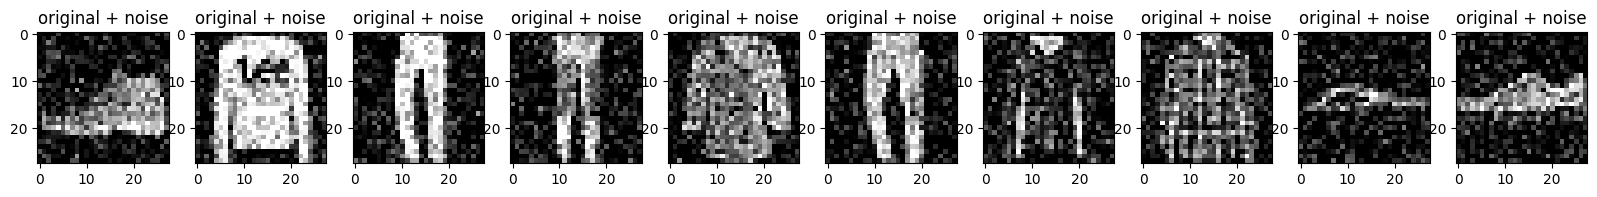

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()


# Budowa i trening VAE




In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:

history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0332 - val_loss: 0.0097
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0093 - val_loss: 0.0086
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0084 - val_loss: 0.0081
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 12/20
1875/1875

## Architektura dekodera

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

## Architektura dekodera

In [ ]:
autoencoder.decoder.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose_4 (Conv2DTranspose) │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

# Odszumione obrazy - wyniki

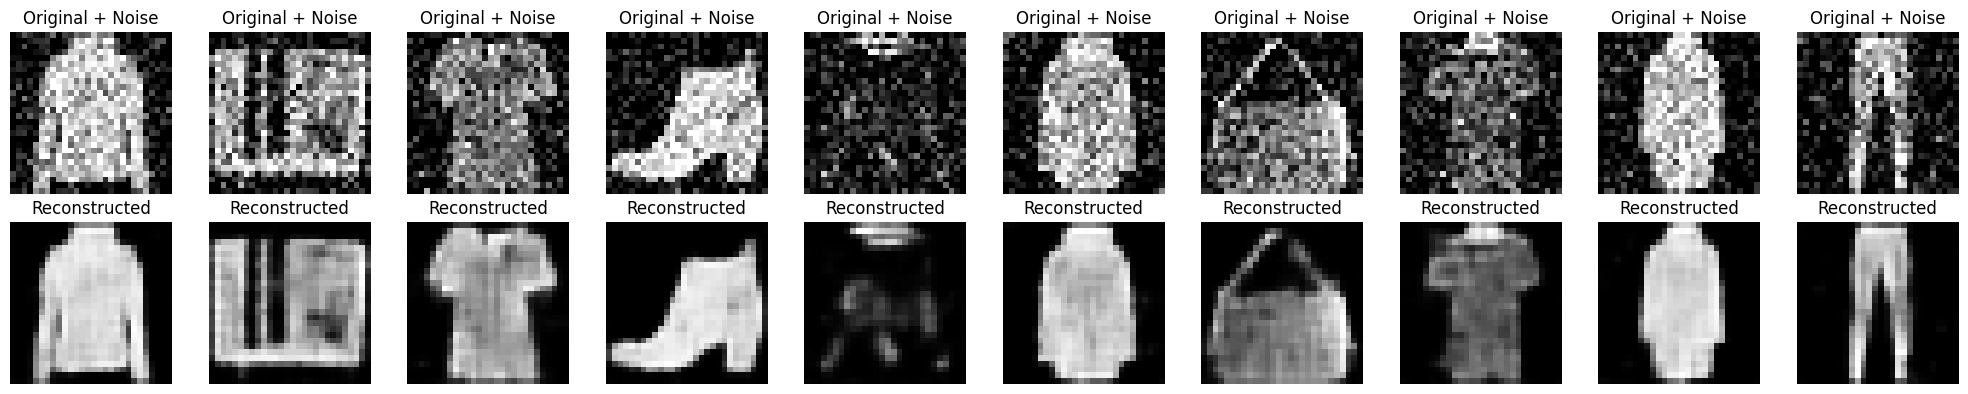

In [ ]:

n = 10

# Losowanie n losowych indeksów
random_indices = np.random.choice(x_test_noisy.shape[0], n, replace=False)

# Przygotowanie figurki
plt.figure(figsize=(20, 4))
for i, idx in enumerate(random_indices):
    # Wyświetlanie oryginalnych obrazów z szumem
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(tf.squeeze(x_test_noisy[idx]), cmap='gray')
    plt.title("Original + Noise")
    ax.axis('off')

    # Wyświetlanie rekonstrukcji
    bx = plt.subplot(2, n, i + n + 1)
    plt.imshow(tf.squeeze(decoded_imgs[idx]), cmap='gray')
    plt.title("Reconstructed")
    bx.axis('off')

plt.tight_layout()
plt.show()

## Przykładowe 10 obrazków z FASHION


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

# Załadowanie danych
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Wybór 10 losowych indeksów
random_indices = np.random.choice(x_train.shape[0], 10, replace=False)
random_images = x_train[random_indices]
random_labels = y_train[random_indices]

# Etykiety klas Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]




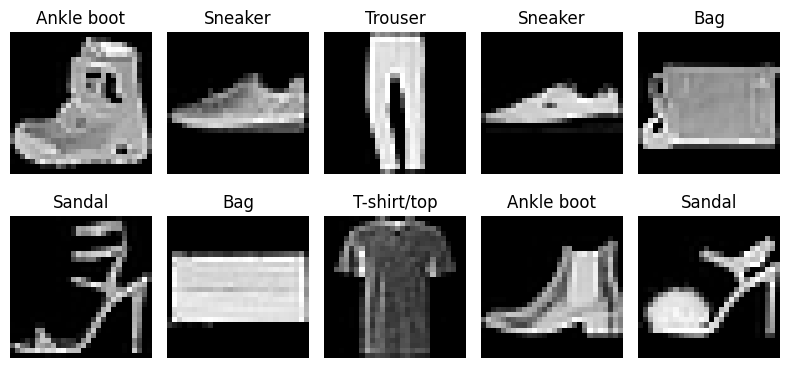

In [ ]:
# Wyświetlenie obrazków
plt.figure(figsize=(8, 4))
for i, (img, label) in enumerate(zip(random_images, random_labels)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(class_names[label])
    plt.axis('off')

plt.tight_layout()
plt.show()


# Wykres historii uczenia

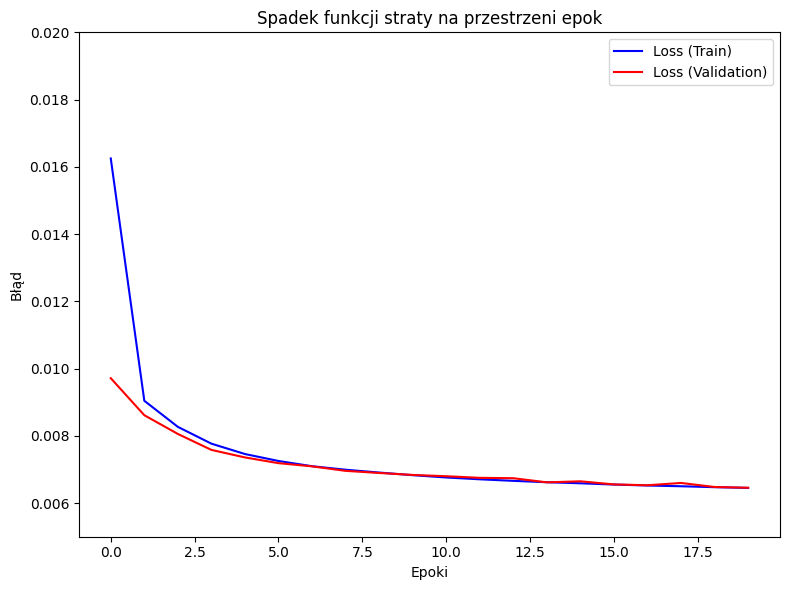

In [ ]:
# Wykres historii uczenia
plt.figure(figsize=(8, 6))

# Wartości funkcji strat dla zbioru treningowego
plt.plot(history.history['loss'], label='Loss (Train)', color='blue')

# Wartości funkcji strat dla zbioru testowego (walidacyjnego)
plt.plot(history.history['val_loss'], label='Loss (Validation)', color='red')

plt.ylim([0.005, 0.02])
plt.title("Spadek funkcji straty na przestrzeni epok")
plt.xlabel("Epoki")
plt.ylabel("Błąd")
plt.legend()

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()


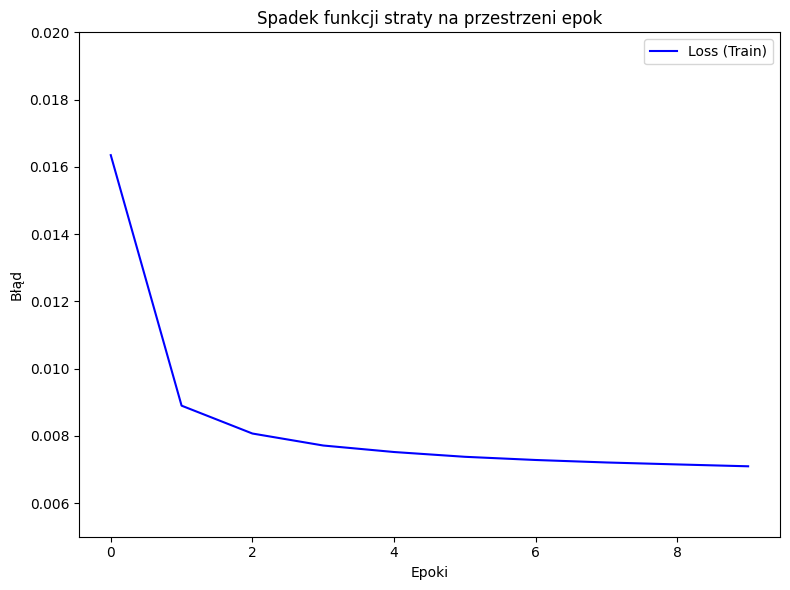

In [ ]:
# Wykres historii uczenia
plt.figure(figsize=(8, 6))

# Wartości funkcji strat dla zbioru treningowego
plt.plot(history.history['loss'], label='Loss (Train)', color='blue')

plt.ylim([0.005, 0.02])
plt.title("Spadek funkcji straty na przestrzeni epok")
plt.xlabel("Epoki")
plt.ylabel("Błąd")
plt.legend()


# Wyświetlenie wykresu
plt.tight_layout()
plt.show()